In [79]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.semi_supervised import LabelSpreading
from nltk.corpus import stopwords
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import nltk, ssl
import string
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/egesa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/egesa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
%pip install --upgrade pyforest
from pyforest import *
lazy_imports()

Note: you may need to restart the kernel to use updated packages.


['import plotly as py',
 'import nltk',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import textblob',
 'import lightgbm as lgb',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.model_selection import KFold',
 'import pickle',
 'import spacy',
 'from sklearn.cluster import KMeans',
 'import pydot',
 'import datetime as dt',
 'import pandas as pd',
 'import statistics',
 'from sklearn.linear_model import LogisticRegression',
 'import os',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import altair as alt',
 'from sklearn import svm',
 'from sklearn.impute import SimpleImputer',
 'from scipy import signal as sg',
 'from sklearn.model_selection import GridSearchCV',
 'import plotly.express as px',
 'import keras',
 'from sklearn.linear_model import ElasticNetCV',
 'import seaborn 

In [78]:
# Load the dataset
# Assuming you have a dataset with columns 'Review' and 'Label' where 'Label' indicates fake or genuine reviews
data = pd.read_csv(R"/Users/egesa/Downloads/FakeDetectionSystem/fake reviews dataset.csv")
data.head();

<IPython.core.display.Javascript object>

In [ ]:
data.shape

(40432, 4)

In [ ]:
data.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
data['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

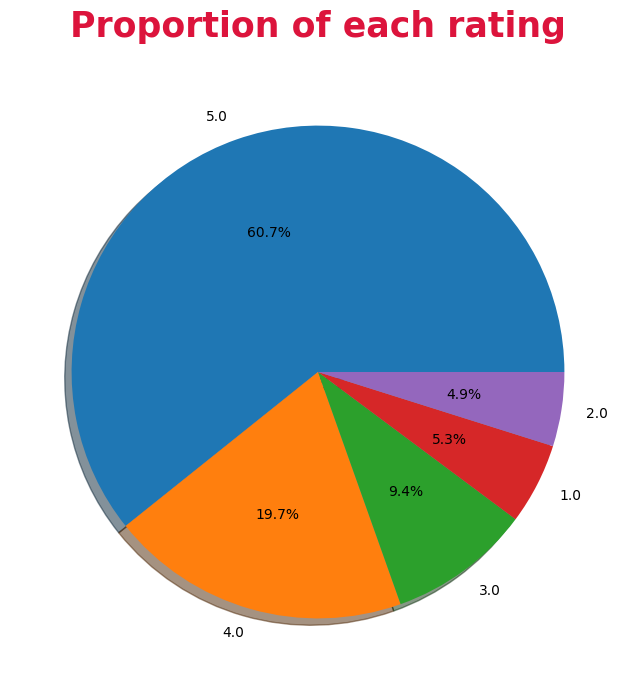

In [ ]:
plt.figure(figsize=(15,8))
labels = data['rating'].value_counts().keys()
values = data['rating'].value_counts().values
explode = (0,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [ ]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
data['text_'][2], clean_text(data['text_'][2])

('Very nice set. Good quality. We have had the set for two months now and have not been',
 'nice set Good quality set two months')

In [ ]:
data['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [ ]:
data['text_'] = data['text_'].astype(str)

In [ ]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text, language="english", preserve_line=True) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [ ]:
preprocess(data['text_'][4])

'Very nice set. Good quality. We set two months'

In [ ]:
data['text_'][:119] = data['text_'][:119].apply(preprocess)

In [ ]:
data['text_'] = data['text_'].str.lower()

In [ ]:
#text input, splits it into words, applies stemming to each word, and then joins the stemmed words back into a single string
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
data['text_'] = data['text_'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
data["text_"] = data["text_"].apply(lambda text: lemmatize_words(text))

In [ ]:
data['text_'].head()

0    love well made sturdi comfortable. i love veri...
1    love great upgrad original. i 've mine coupl year
2        thi pillow save back. i love look feel pillow
3                miss inform use great product price i
4        veri nice set. good quality. we set two month
Name: text_, dtype: object

In [ ]:
data.to_csv(R"/Users/egesa/Downloads/FakeDetectionSystem/pre_processed_set.csv")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv(R"/Users/egesa/Downloads/FakeDetectionSystem/pre_processed_set.csv")
data.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfortable. i love veri...
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad original. i 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back. i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set. good quality. we set two month


In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfortable. i love veri...
1,Home_and_Kitchen_5,5.0,CG,love great upgrad original. i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back. i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set. good quality. we set two month


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['length'] = data['text_'].apply(len)

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
 4   length    40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


,category,rating,label,text_,length
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfortable. i love veri...,53
1,Home_and_Kitchen_5,5.0,CG,love great upgrad original. i 've mine coupl year,49
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back. i love look feel pillow,45
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i,37
4,Home_and_Kitchen_5,5.0,CG,veri nice set. good quality. we set two month,45


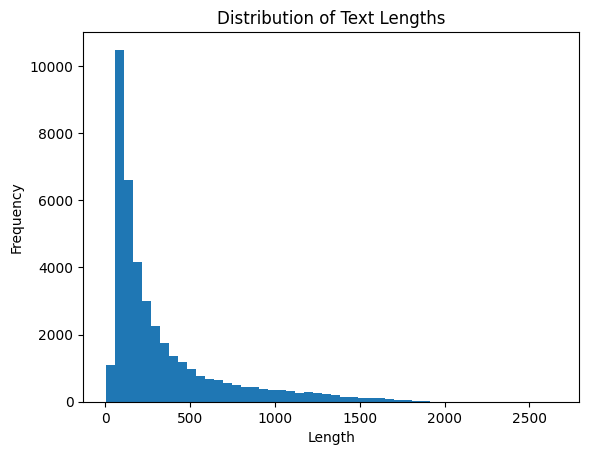

In [ ]:
plt.hist(data['length'],bins=50)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

In [ ]:
data.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                  
             mean         std   min    25%    50%    75%     max  
label                                                             
CG     288.660863  290.011906   3.0   90.0  165.0  361.0  1649.0  
OR     370.646567  389.695935  14.0  114.0  210.0  464.0  2660.0

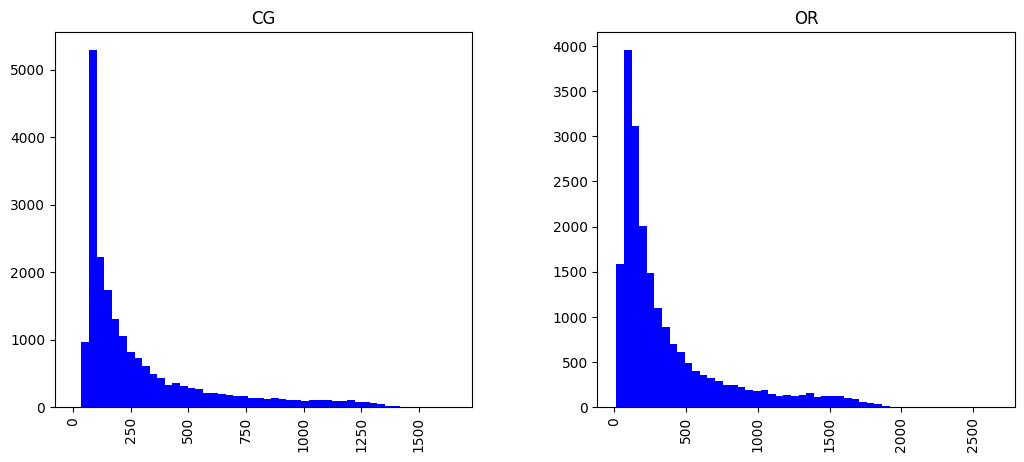

In [ ]:
data.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [ ]:
data[data['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

'weak on current science. after see it twice, i agre with much (but not all) of the posit five star reviews. out of respect for those who read reviews, i\'ll not repeat everyth that i like about the presentation. i found the goofi over earrings, hairdo, and facial hair arrang of daniel vitalis, (describ a a "wild food expert") distracting. ugh. ditto for david wolfe, who had an extrem goofi wild hairdo. on the other hand, jon gabriel, describ a an "author and weight loss expert" wa nice groom and a good presenter. hi stori of person transform of a fellow of over 400 pound (whew) to becom a jock of normal weight wa inspiring. christian northrup preserv her rank a one of america\' cutest doctors. a realli nice look woman! present by dr. mercola, jason vale, kri carr, alejandro junger were fine. it wa disappoint to have jami oliv (so popular in the uk) give babi cow growth fluid a pas with unscientif but popular idea on milk. none of the present had anyth (zilch) to say about the work of 

In [ ]:
data.length.describe()

count    40432.000000
mean       329.653715
std        345.922609
min          3.000000
25%        100.000000
50%        187.000000
75%        411.000000
max       2660.000000
Name: length, dtype: float64

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x17ced54e0>)

In [ ]:
bow_transformer.fit(data['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 47208


In [ ]:
review4 = data['text_'][3]
review4

'miss inform use great product price i'

In [ ]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 18739)	1
  (0, 21912)	1
  (0, 27266)	1
  (0, 32655)	1
  (0, 32848)	1
  (0, 44278)	1
(1, 47208)


In [ ]:
print(bow_transformer.get_feature_names_out()[161])
print(bow_transformer.get_feature_names_out()[232])

10pound
11oz


In [ ]:
bow_reviews = bow_transformer.transform(data['text_'])

In [ ]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40432, 47208)
Amount of non zero values in the bag of words model: 1117585


In [ ]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.06


In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 18739)	1
  (0, 21912)	1
  (0, 27266)	1
  (0, 32655)	1
  (0, 32848)	1
  (0, 44278)	1


In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40432, 47208)
No. of Dimensions: 2


In [ ]:
#Creating training and testing data
review_train, review_test, label_train, label_test = train_test_split(data['text_'],data['label'],test_size=0.2)

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [ ]:
#Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x17ced54e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(review_test)
predictions

array(['CG', 'CG', 'CG', ..., 'CG', 'OR', 'OR'], dtype='<U2')

In [ ]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.83      0.90      0.86      4063
          OR       0.89      0.81      0.85      4024

    accuracy                           0.85      8087
   macro avg       0.86      0.85      0.85      8087
weighted avg       0.86      0.85      0.85      8087

Confusion Matrix: [[3644  419]
 [ 769 3255]]
Accuracy Score: 0.8530975639915914


In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 85.31%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x17ced54e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.83      0.89      0.86      4063
          OR       0.88      0.81      0.84      4024

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Confusion Matrix: [[3604  459]
 [ 749 3275]]
Accuracy Score: 0.8506244590082849
Model Prediction Accuracy: 85.06%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x17ced54e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['CG', 'CG', 'CG', ..., 'OR', 'OR', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.74      0.77      0.75      4063
          OR       0.76      0.73      0.74      4024

    accuracy                           0.75      8087
   macro avg       0.75      0.75      0.75      8087
weighted avg       0.75      0.75      0.75      8087

Confusion Matrix: [[3109  954]
 [1084 2940]]
Accuracy Score: 0.7479906022010634
Model Prediction Accuracy: 74.8%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x17ced54e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.54      0.97      0.70      4063
          OR       0.87      0.17      0.28      4024

    accuracy                           0.57      8087
   macro avg       0.71      0.57      0.49      8087
weighted avg       0.70      0.57      0.49      8087

Confusion Matrix: [[3961  102]
 [3349  675]]
Accuracy Score: 0.5732657351304563
Model Prediction Accuracy: 57.33%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x17ced54e0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'CG', 'CG', ..., 'CG', 'OR', 'OR'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.87      0.89      4063
          OR       0.88      0.90      0.89      4024

    accuracy                           0.89      8087
   macro avg       0.89      0.89      0.89      8087
weighted avg       0.89      0.89      0.89      8087

Confusion Matrix: [[3549  514]
 [ 387 3637]]
Accuracy Score: 0.8885866205020403
Model Prediction Accuracy: 88.86%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x17ced54e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'CG', 'CG', ..., 'CG', 'OR', 'OR'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.88      0.86      0.87      4063
          OR       0.87      0.89      0.88      4024

    accuracy                           0.87      8087
   macro avg       0.88      0.88      0.87      8087
weighted avg       0.88      0.87      0.87      8087

Confusion Matrix: [[3509  554]
 [ 457 3567]]
Accuracy Score: 0.8749845430938543
Model Prediction Accuracy: 87.5%


In [ ]:
#Findings and Conclusion
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 87.5%
K Nearest Neighbors Prediction Accuracy: 57.33%
Decision Tree Classifier Prediction Accuracy: 74.8%
Random Forests Classifier Prediction Accuracy: 85.06%
Support Vector Machines Prediction Accuracy: 88.86%
Multinomial Naive Bayes Prediction Accuracy: 85.31%


In [ ]:
# Save the trained model
# Replace 'model_filename.pkl' with the desired filename
import joblib
joblib.dump(pipeline, 'trained.pkl')

['trained.pkl']